## Finetuning a network
Git clone from this repository: https://github.com/MiguelAMartinez/flowers-image-classifier

In [1]:
import os

ROOT_DIR = os.getcwd()
os.chdir(ROOT_DIR + '/flowers-image-classifier')

## Task 1
Replace the used base model (densenet169) to another model (refer to https://pytorch.org/vision/0.8/models.html for more types of models). Pls compare the performance of these two models on the validation set.

### Changelog
I replaced the base model with resnet18.

1. In `train.py`: A checking condition for the architecture type (either densenet169 or resnet18)
2. In `model_ic.py`: A separate `make_NN_resnet()` (for resnet18), similar to `make_NN()` (for densenet169)
    - Replaced all occurrences of `model.classifier` with `model.fc`

In [2]:
%run train.py "flowers" --gpu --epoch 5 --arch densenet169

Epoch: 1/5 -  Training Loss: 4.324 -  Validation Loss: 3.689 -  Validation Accuracy: 0.250
Epoch: 1/5 -  Training Loss: 3.278 -  Validation Loss: 2.479 -  Validation Accuracy: 0.499
Epoch: 1/5 -  Training Loss: 2.447 -  Validation Loss: 1.610 -  Validation Accuracy: 0.674
Epoch: 1/5 -  Training Loss: 1.696 -  Validation Loss: 1.098 -  Validation Accuracy: 0.764
Epoch: 1/5 -  Training Loss: 1.285 -  Validation Loss: 0.851 -  Validation Accuracy: 0.813
Epoch: 2/5 -  Training Loss: 1.098 -  Validation Loss: 0.689 -  Validation Accuracy: 0.848
Epoch: 2/5 -  Training Loss: 0.932 -  Validation Loss: 0.606 -  Validation Accuracy: 0.862
Epoch: 2/5 -  Training Loss: 0.858 -  Validation Loss: 0.517 -  Validation Accuracy: 0.891
Epoch: 2/5 -  Training Loss: 0.743 -  Validation Loss: 0.438 -  Validation Accuracy: 0.908
Epoch: 2/5 -  Training Loss: 0.706 -  Validation Loss: 0.441 -  Validation Accuracy: 0.910
Epoch: 3/5 -  Training Loss: 0.676 -  Validation Loss: 0.382 -  Validation Accuracy: 0.905

In [3]:
%run train.py "flowers" --gpu --epoch 5 --arch resnet18

Epoch: 1/5 -  Training Loss: 4.342 -  Validation Loss: 3.582 -  Validation Accuracy: 0.323
Epoch: 1/5 -  Training Loss: 3.233 -  Validation Loss: 2.394 -  Validation Accuracy: 0.480
Epoch: 1/5 -  Training Loss: 2.328 -  Validation Loss: 1.638 -  Validation Accuracy: 0.641
Epoch: 1/5 -  Training Loss: 1.874 -  Validation Loss: 1.224 -  Validation Accuracy: 0.715
Epoch: 1/5 -  Training Loss: 1.527 -  Validation Loss: 0.975 -  Validation Accuracy: 0.802
Epoch: 2/5 -  Training Loss: 1.237 -  Validation Loss: 0.785 -  Validation Accuracy: 0.823
Epoch: 2/5 -  Training Loss: 1.103 -  Validation Loss: 0.692 -  Validation Accuracy: 0.837
Epoch: 2/5 -  Training Loss: 0.983 -  Validation Loss: 0.618 -  Validation Accuracy: 0.857
Epoch: 2/5 -  Training Loss: 0.963 -  Validation Loss: 0.599 -  Validation Accuracy: 0.851
Epoch: 2/5 -  Training Loss: 0.898 -  Validation Loss: 0.530 -  Validation Accuracy: 0.886
Epoch: 3/5 -  Training Loss: 0.777 -  Validation Loss: 0.477 -  Validation Accuracy: 0.883

## Task 2
Please try different training methods that use densenet169 as the base model (i.e., training the whole model from scratch, finetuning the model but only updating the top layers, finetuning the whole model), and compare their performance on the validation set. Please also draw the curves of training/validation losses over training steps for these methods, and give your analysis based on the observed curves.

### Changelog
1. In `train.py`:
    1. Extra argument parser called `training_pref` (default="finetune_top"), which accepts the following values:
        - scratch
        - finetune_top
        - finetune_all
    2. Extra argument parser called `plot_graph` (default=False), which plots the train and test loss-step graph.
2. In `make_NN()` of `model_ic.py`:
    1. Checking conditions for the argument values of `training_pref`, which freezes the model parameters accordingly
    2. A more general solution that passes a list of trainable parameters into the Adam optimizer
        - `optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)`
3. In `utils_ic.py`:
    1. Wrote an extra `plot_loss_step_graph()`, which plots the average train and test loss every 40 steps. The function is imported by `model_ic.py` and used in `make_NN()`
    2. In `load_data()`: Reduced the `trainloader` batch size from 64 to 32, due to lack of memory in CUDA

### a) Training the whole model from scratch
Loading the densenet169 model, with pretrained set to False. All the parameters in the model are set to trainable.

Epoch: 1/5 -  Training Loss: 4.508 -  Validation Loss: 4.899 -  Validation Accuracy: 0.071
Epoch: 1/5 -  Training Loss: 4.085 -  Validation Loss: 4.107 -  Validation Accuracy: 0.114
Epoch: 1/5 -  Training Loss: 3.916 -  Validation Loss: 3.857 -  Validation Accuracy: 0.105
Epoch: 1/5 -  Training Loss: 3.813 -  Validation Loss: 3.600 -  Validation Accuracy: 0.115
Epoch: 1/5 -  Training Loss: 3.616 -  Validation Loss: 3.460 -  Validation Accuracy: 0.170
Epoch: 2/5 -  Training Loss: 3.607 -  Validation Loss: 3.716 -  Validation Accuracy: 0.113
Epoch: 2/5 -  Training Loss: 3.528 -  Validation Loss: 3.486 -  Validation Accuracy: 0.135
Epoch: 2/5 -  Training Loss: 3.442 -  Validation Loss: 3.260 -  Validation Accuracy: 0.170
Epoch: 2/5 -  Training Loss: 3.449 -  Validation Loss: 3.308 -  Validation Accuracy: 0.174
Epoch: 2/5 -  Training Loss: 3.403 -  Validation Loss: 3.227 -  Validation Accuracy: 0.173
Epoch: 3/5 -  Training Loss: 3.305 -  Validation Loss: 3.022 -  Validation Accuracy: 0.209

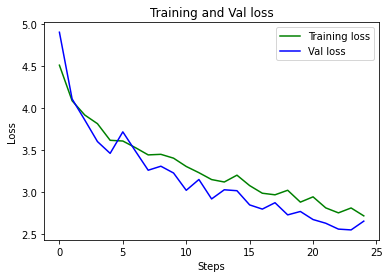

In [4]:
%run train.py "flowers" --gpu --epoch 5 --training_pref scratch --plot_graph True --arch densenet169

### b) Finetuning the model but only updating the top layers
Loading the densenet169 model, with pretrained set to True. All the parameters of the base model are set to non-trainable. Only the top layer (i.e. the classifier head) is trainable. 

Epoch: 1/5 -  Training Loss: 4.324 -  Validation Loss: 3.709 -  Validation Accuracy: 0.279
Epoch: 1/5 -  Training Loss: 3.297 -  Validation Loss: 2.549 -  Validation Accuracy: 0.465
Epoch: 1/5 -  Training Loss: 2.434 -  Validation Loss: 1.676 -  Validation Accuracy: 0.639
Epoch: 1/5 -  Training Loss: 1.771 -  Validation Loss: 1.170 -  Validation Accuracy: 0.752
Epoch: 1/5 -  Training Loss: 1.471 -  Validation Loss: 0.892 -  Validation Accuracy: 0.827
Epoch: 2/5 -  Training Loss: 1.081 -  Validation Loss: 0.670 -  Validation Accuracy: 0.869
Epoch: 2/5 -  Training Loss: 0.949 -  Validation Loss: 0.601 -  Validation Accuracy: 0.871
Epoch: 2/5 -  Training Loss: 0.905 -  Validation Loss: 0.508 -  Validation Accuracy: 0.896
Epoch: 2/5 -  Training Loss: 0.727 -  Validation Loss: 0.449 -  Validation Accuracy: 0.903
Epoch: 2/5 -  Training Loss: 0.763 -  Validation Loss: 0.429 -  Validation Accuracy: 0.901
Epoch: 3/5 -  Training Loss: 0.661 -  Validation Loss: 0.381 -  Validation Accuracy: 0.904

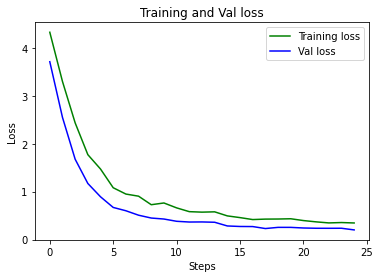

In [5]:
%run train.py "flowers" --gpu --epoch 5 --training_pref finetune_top --plot_graph True --arch densenet169 --save_dir "modelcp.pth"

### c) Finetuning the whole model
Loading the densenet169 model, with pretrained set to True. All the parameters in the model are set to trainable.

Epoch: 1/5 -  Training Loss: 4.172 -  Validation Loss: 3.604 -  Validation Accuracy: 0.194
Epoch: 1/5 -  Training Loss: 3.296 -  Validation Loss: 2.934 -  Validation Accuracy: 0.281
Epoch: 1/5 -  Training Loss: 2.576 -  Validation Loss: 2.383 -  Validation Accuracy: 0.379
Epoch: 1/5 -  Training Loss: 2.248 -  Validation Loss: 1.900 -  Validation Accuracy: 0.474
Epoch: 1/5 -  Training Loss: 1.862 -  Validation Loss: 1.858 -  Validation Accuracy: 0.530
Epoch: 2/5 -  Training Loss: 1.574 -  Validation Loss: 1.324 -  Validation Accuracy: 0.618
Epoch: 2/5 -  Training Loss: 1.500 -  Validation Loss: 1.345 -  Validation Accuracy: 0.620
Epoch: 2/5 -  Training Loss: 1.328 -  Validation Loss: 1.105 -  Validation Accuracy: 0.694
Epoch: 2/5 -  Training Loss: 1.137 -  Validation Loss: 1.189 -  Validation Accuracy: 0.692
Epoch: 2/5 -  Training Loss: 1.224 -  Validation Loss: 0.825 -  Validation Accuracy: 0.760
Epoch: 3/5 -  Training Loss: 0.969 -  Validation Loss: 1.005 -  Validation Accuracy: 0.733

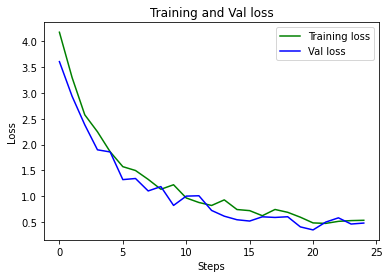

In [6]:
%run train.py "flowers" --gpu --epoch 5 --training_pref finetune_all --plot_graph True --arch densenet169

## Task 3
For the model based on densenet169, please also report its performance (when you use the training method of finetuning the model but only updating the top layers) on the testing set.

### Changelog
1. Extra `evaluate.py` file, which prints the testing accuracy of the model given a test dataset
    - Can be found in hw3/task2/flowers-image-classifier/evaluate.py

In [7]:
%run evaluate.py "flowers" "modelcp.pth" --gpu

Testing Accuracy: 0.927


# Task 4
Please replace the base model to a new model which contains some convolutional layers. You need to write this new model by yourselves, and then report its performance on the validation set. Note, pls try different numbers of convolutional layers for your model, and compare their results, and give analysis for the results. You need to try at least 2 different numbers of conv layers.

### Changelog
1. In `model_ic.py`:
    1. A new `CustomCNN` class, which takes in variable number of convolution layers specified by user
    2. A separate `make_NN_CNN()`, similar to `make_NN()` (for densenet169), that creates an instance of the `CustomCNN` class
2. In `train.py`:
    1. Extra argument parser called `num_layers` (default=1)
    2. If the argument value of `arch` is custom, call the `make_NN_CNN()`

### 2 conv layers 

Epoch: 1/10 -  Training Loss: 4.300 -  Validation Loss: 3.896 -  Validation Accuracy: 0.113
Epoch: 1/10 -  Training Loss: 3.683 -  Validation Loss: 3.439 -  Validation Accuracy: 0.148
Epoch: 1/10 -  Training Loss: 3.450 -  Validation Loss: 3.210 -  Validation Accuracy: 0.190
Epoch: 1/10 -  Training Loss: 3.183 -  Validation Loss: 3.023 -  Validation Accuracy: 0.232
Epoch: 1/10 -  Training Loss: 2.988 -  Validation Loss: 2.960 -  Validation Accuracy: 0.213
Epoch: 2/10 -  Training Loss: 2.957 -  Validation Loss: 2.835 -  Validation Accuracy: 0.271
Epoch: 2/10 -  Training Loss: 2.922 -  Validation Loss: 2.736 -  Validation Accuracy: 0.275
Epoch: 2/10 -  Training Loss: 2.819 -  Validation Loss: 2.642 -  Validation Accuracy: 0.319
Epoch: 2/10 -  Training Loss: 2.648 -  Validation Loss: 2.572 -  Validation Accuracy: 0.321
Epoch: 2/10 -  Training Loss: 2.650 -  Validation Loss: 2.554 -  Validation Accuracy: 0.318
Epoch: 3/10 -  Training Loss: 2.634 -  Validation Loss: 2.550 -  Validation Accu

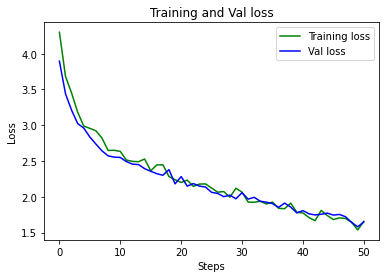

In [8]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 2 --plot_graph True --arch custom

### 3 conv layers 

Epoch: 1/10 -  Training Loss: 4.286 -  Validation Loss: 3.886 -  Validation Accuracy: 0.097
Epoch: 1/10 -  Training Loss: 3.644 -  Validation Loss: 3.438 -  Validation Accuracy: 0.149
Epoch: 1/10 -  Training Loss: 3.337 -  Validation Loss: 3.289 -  Validation Accuracy: 0.190
Epoch: 1/10 -  Training Loss: 3.133 -  Validation Loss: 3.001 -  Validation Accuracy: 0.213
Epoch: 1/10 -  Training Loss: 3.099 -  Validation Loss: 2.922 -  Validation Accuracy: 0.247
Epoch: 2/10 -  Training Loss: 2.881 -  Validation Loss: 2.805 -  Validation Accuracy: 0.260
Epoch: 2/10 -  Training Loss: 2.795 -  Validation Loss: 2.715 -  Validation Accuracy: 0.276
Epoch: 2/10 -  Training Loss: 2.784 -  Validation Loss: 2.660 -  Validation Accuracy: 0.312
Epoch: 2/10 -  Training Loss: 2.706 -  Validation Loss: 2.613 -  Validation Accuracy: 0.277
Epoch: 2/10 -  Training Loss: 2.543 -  Validation Loss: 2.529 -  Validation Accuracy: 0.320
Epoch: 3/10 -  Training Loss: 2.574 -  Validation Loss: 2.450 -  Validation Accu

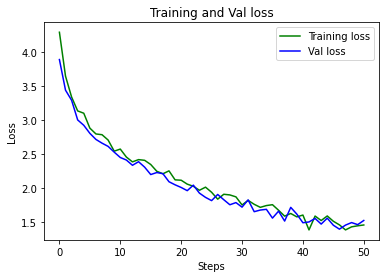

In [9]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 3 --plot_graph True --arch custom

### 4 conv layers 

Epoch: 1/10 -  Training Loss: 4.248 -  Validation Loss: 3.790 -  Validation Accuracy: 0.106
Epoch: 1/10 -  Training Loss: 3.676 -  Validation Loss: 3.355 -  Validation Accuracy: 0.182
Epoch: 1/10 -  Training Loss: 3.356 -  Validation Loss: 3.113 -  Validation Accuracy: 0.203
Epoch: 1/10 -  Training Loss: 3.245 -  Validation Loss: 3.086 -  Validation Accuracy: 0.206
Epoch: 1/10 -  Training Loss: 3.034 -  Validation Loss: 2.939 -  Validation Accuracy: 0.234
Epoch: 2/10 -  Training Loss: 2.733 -  Validation Loss: 2.710 -  Validation Accuracy: 0.292
Epoch: 2/10 -  Training Loss: 2.736 -  Validation Loss: 2.620 -  Validation Accuracy: 0.314
Epoch: 2/10 -  Training Loss: 2.704 -  Validation Loss: 2.744 -  Validation Accuracy: 0.273
Epoch: 2/10 -  Training Loss: 2.653 -  Validation Loss: 2.511 -  Validation Accuracy: 0.341
Epoch: 2/10 -  Training Loss: 2.550 -  Validation Loss: 2.298 -  Validation Accuracy: 0.374
Epoch: 3/10 -  Training Loss: 2.444 -  Validation Loss: 2.470 -  Validation Accu

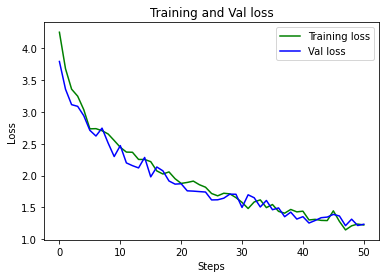

In [10]:
%run train.py "flowers" --gpu --epoch 10 --num_layers 4 --plot_graph True --arch custom